### 1) Import libraries/ Dipendancies -

In [115]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

from scipy.stats import zscore,mode
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
%matplotlib inline

import pandas_profiling
import ydata_profiling

import json
import pickle

import plotly.express as ex

### 2) Data Gathering and Data Validitation - 

In [ ]:
# Recieved data according to Schema file and got the data
# for DQ check we have used Microsoft Excel

In [109]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

### 3) EDA (Exploratory Data Analysis) - 

In [ ]:
Steps Involved in EDA - 
    1) Information about Datset
    2) Describe Dataset
    3) Find Missing Values / Percentage of Missing Values
    4) Value Counts of Each Object Feature
    4) Desciding Encoding Types
    5) Outliers Detection
    6) Correlation with Target Feature
    7) VIF (Variance Inflation Factor)
    8) Status of Target Feature
    9) EDA report

- Information about Datset

In [5]:
# Here we have got basic information about data like non null count, memory usage and Data type of Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


- Describe Dataset

In [113]:
# Here we are printing Description of dataset and got all the stats.
df.describe().T

count          mean           std      min  \
person_age                  32581.0     27.734600      6.348078    20.00   
person_income               32581.0  66074.848470  61983.119168  4000.00   
person_emp_length           31686.0      4.789686      4.142630     0.00   
loan_amnt                   32581.0   9589.371106   6322.086646   500.00   
loan_int_rate               29465.0     11.011695      3.240459     5.42   
loan_status                 32581.0      0.218164      0.413006     0.00   
loan_percent_income         32581.0      0.170203      0.106782     0.00   
cb_person_cred_hist_length  32581.0      5.804211      4.055001     2.00   

                                 25%       50%       75%         max  
person_age                     23.00     26.00     30.00      144.00  
person_income               38500.00  55000.00  79200.00  6000000.00  
person_emp_length               2.00      4.00      7.00      123.00  
loan_amnt                    5000.00   8000.00  12200.00    35000.00  
loan_int_rate                   7.90     10.99     13.47       23.22  
loan_status                     0.00      0.00      0.00        1.00  
loan_percent_income             0.09      0.15      0.23        0.83  
cb_person_cred_hist_length      3.00      4.00      8.00       30.00

- Find Missing Values / Percentage of Missing Values

In [7]:
# Count of Missing Values in Each Numerical Feature, 
# There are Missing values in person_emp_length and loan_int_rate features.
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
# Percentage of Missing Values in Each Numerical Feature
# There are 2.74 % Missing vales in person_emp_length feature and 9.56 % in loan_int_rate Feature
df.isna().mean() * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

- Value Counts of Each Object Feature

In [15]:
# Here we are checking for the Value counts of each Object datatype features.Targetting 4 Object Datatype 
# feature which are person_home_ownership,loan_intent,loan_grade and cb_person_default_on_file
cols = df.select_dtypes(include="object").columns.to_list()
for feature in cols:
    print("Column Name - ",feature)
    print(df[feature].value_counts().sort_values(ascending=False))
    print()

Column Name -  person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

Column Name -  loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

Column Name -  loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

Column Name -  cb_person_default_on_file
N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64



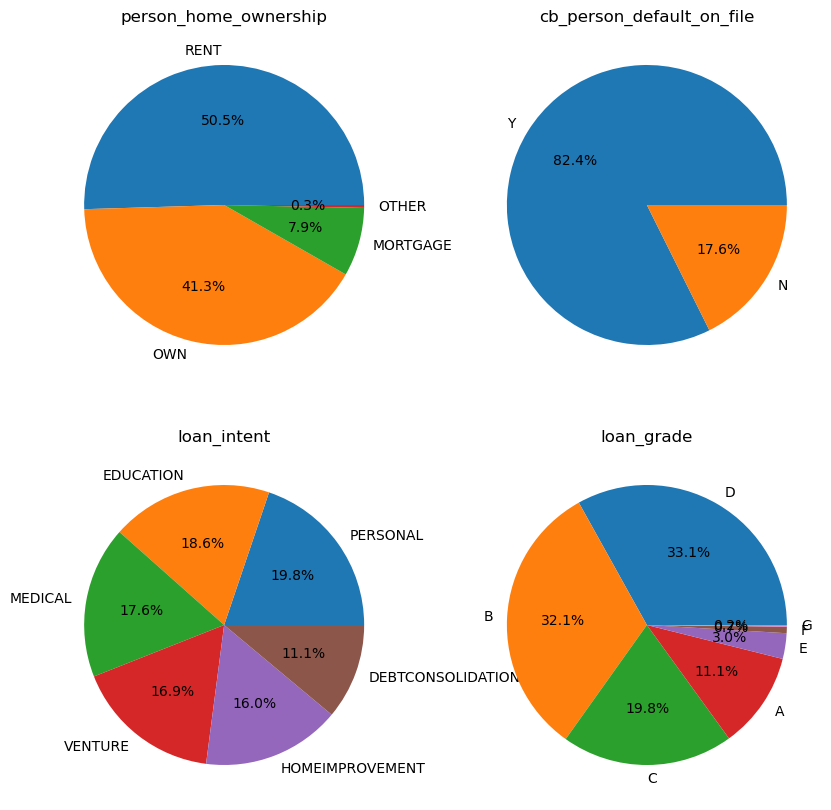

In [83]:
# Pie plot of Value counts in the feature Person_home_ownership,loan_intent,cb_person_default_on_file and loan_grade
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
line1 = plt.pie(df["person_home_ownership"].value_counts(),labels = df["person_home_ownership"].unique(),autopct="%1.1f%%")
plt.title('person_home_ownership')
ax1 = fig.add_subplot(223)
line2 = plt.pie(df["loan_intent"].value_counts(),labels = df["loan_intent"].unique(),autopct="%1.1f%%")
plt.title('loan_intent')
ax1 = fig.add_subplot(222)
line3 = plt.pie(df["cb_person_default_on_file"].value_counts(),labels = df["cb_person_default_on_file"].unique()
                ,autopct="%1.1f%%")
plt.title('cb_person_default_on_file')
ax1 = fig.add_subplot(224)
line4 = plt.pie(df["loan_grade"].value_counts(),labels = df["loan_grade"].unique(),autopct="%1.1f%%")
plt.title('loan_grade')
plt.show()

In [141]:
ex.pie(df,names='person_home_ownership',title='person_home_ownership',hole=0.33)

In [75]:
ex.pie(df,names='loan_intent',title='loan_intent',hole=0.33)

In [81]:
ex.pie(df,names='cb_person_default_on_file',title='Propotion Of CB Person Default On File',hole=0.33)

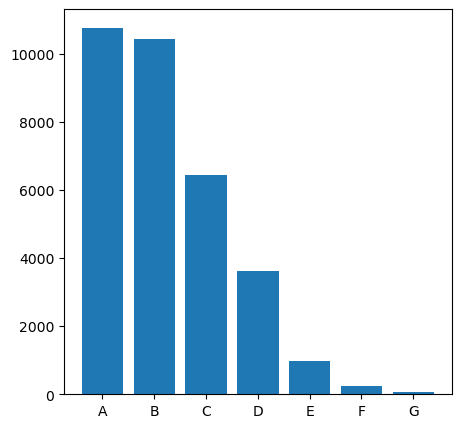

In [50]:
# bar graph of Value counts in the feature loan-grade
dict1 = df["loan_grade"].value_counts().to_dict()
x1 = list(dict1.keys())
y1 = list(dict1.values())
plt.figure(figsize=(5,5))
plt.bar(x1,y1)
plt.show()

- Desciding Encoding Types

In [55]:
# Checking for any sequence is the object columns so we can select encoding techniques.
cols = df.select_dtypes(include="object").columns.to_list()
for feature in cols:
    print("Column Name - ",feature)
    print(df[feature].unique())
    print()

Column Name -  person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column Name -  loan_intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column Name -  loan_grade
['D' 'B' 'C' 'A' 'E' 'F' 'G']

Column Name -  cb_person_default_on_file
['Y' 'N']



In [ ]:
# Here we can clearely see there is no any precedence or sequence in the person_home_ownership, 
# loan_intent and loan_grade Features so we have to use either get_dummies() or OneHotEncoding Technique.

In [ ]:
Features for OneHotEncoding / Get Dummies - person_home_ownership, loan_intent, loan_grade

In [ ]:
# Here we can clearely see there is precedence or sequence in the cb_person_default_on_file
# Feature so we have to use either replace() or Ordinal Encoding Technique.

In [ ]:
Features for OrdinalEncoding / replace - cb_person_default_on_file

In [ ]:
# As there are numerical values in the loan_status feature i.e Target Feature so we doesnt require 
# need of Label Encoding Technique

- Outliers Detection

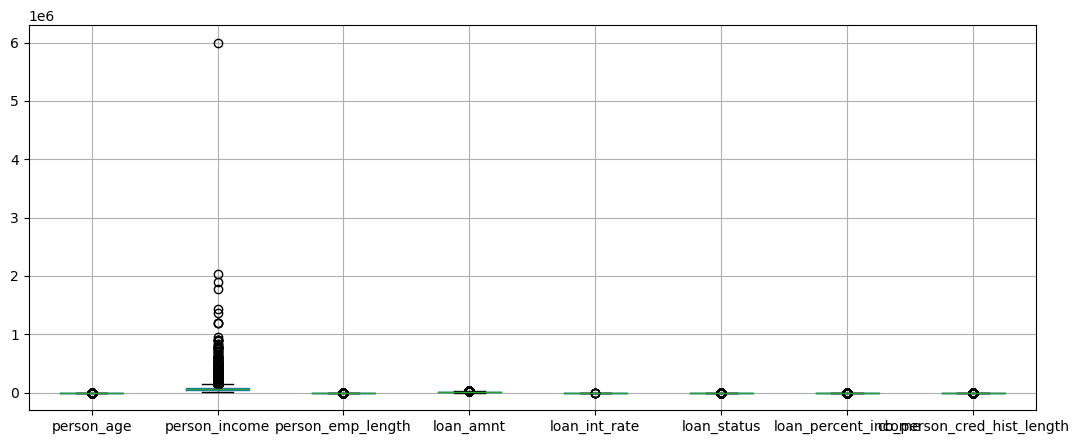

In [66]:
# Here we can see there ae outliers in the every feature
plt.figure(figsize=(13,5))
df.boxplot()
plt.show()

<AxesSubplot:xlabel='person_age'>

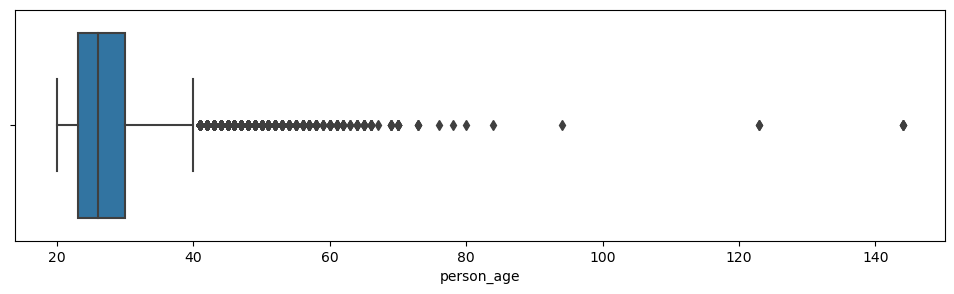

In [70]:
# Checking of outliers in person_age Feature
plt.figure(figsize=(12,3))
sns.boxplot(df["person_age"])

In [86]:
# Count of outliers in person_age by using Z-score method
z = zscore(df["person_age"]).to_list()
z1 = []
for i in z:
    if i > 3 or i <-3:
        z1.append(i)
print(f"Count of Outliers in person_age - {len(z1)}")

Count of Outliers in person_age - 558


<AxesSubplot:xlabel='person_income'>

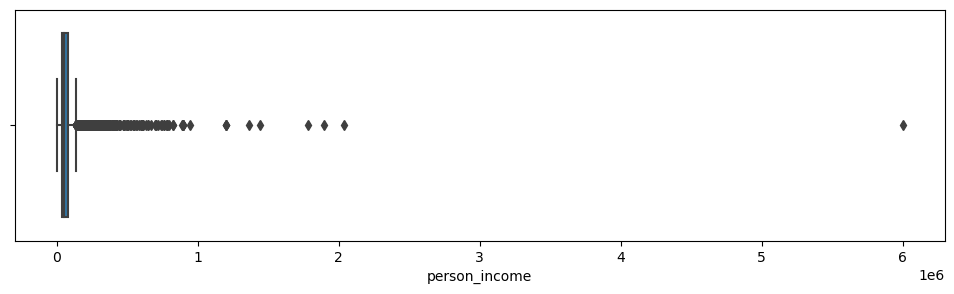

In [71]:
# Checking of outliers in person_income Feature, we can see there is one extreme outlier
plt.figure(figsize=(12,3))
sns.boxplot(df["person_income"])

In [100]:
# Count of outliers in person_income by using Z-score method
z = zscore(df["person_income"]).to_list()
z2 = []
for i in z:
    if i > 3 or i <-3:
        z2.append(i)
print(f"Count of Outliers in person_income - {len(z2)}")

Count of Outliers in person_income - 233


In [99]:
# Count of Outliers using iqr method to crosscheck the above result.
q1 = df["person_income"].quantile(0.25)
q3 = df["person_income"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
print(f"Upper tail - {upper_tail}\nLower tail - {lower_tail}")
count = df.loc[(df["person_income"] > upper_tail) | (df["person_income"] < lower_tail)].shape[0]
print(f"Count of Outliers in person_income - {count}")

Upper tail - 140250.0
Lower tail - -22550.0
Count of Outliers in person_income - 1484


<AxesSubplot:xlabel='person_emp_length'>

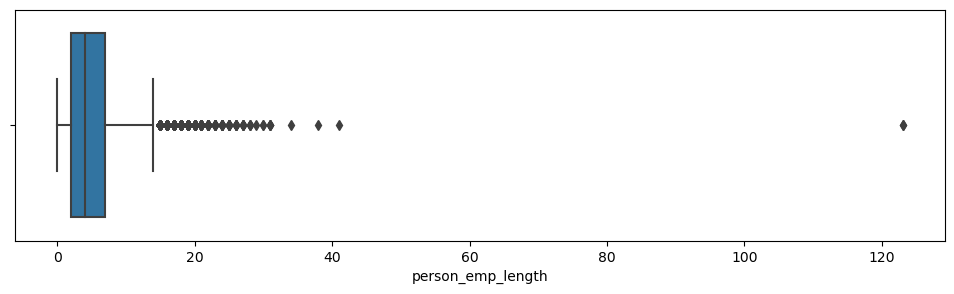

In [72]:
# Checking of outliers in person_emp_length Feature,we can see there is one extreme outlier.
plt.figure(figsize=(12,3))
sns.boxplot(df["person_emp_length"])

In [103]:
# Count of outliers in person_emp_length by using Z-score method, here z-score is showing
z = zscore(df["person_emp_length"]).to_list()
z1 = []
for i in z:
    if i > 3 or i < -3:
        z1.append(i)
print(f"Count of Outliers in person_emp_length - {len(z1)}")

Count of Outliers in person_emp_length - 0


In [102]:
# Count of Outliers using iqr method to crosscheck the above result.
q1 = df["person_emp_length"].quantile(0.25)
q3 = df["person_emp_length"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
print(f"Upper tail - {upper_tail}\nLower tail - {lower_tail}")
count = df.loc[(df["person_emp_length"] > upper_tail) | (df["person_emp_length"] < lower_tail)].shape[0]
print(f"Count of Outliers in person_emp_length - {count}")

Upper tail - 14.5
Lower tail - -5.5
Count of Outliers in person_emp_length - 853


<AxesSubplot:xlabel='loan_amnt'>

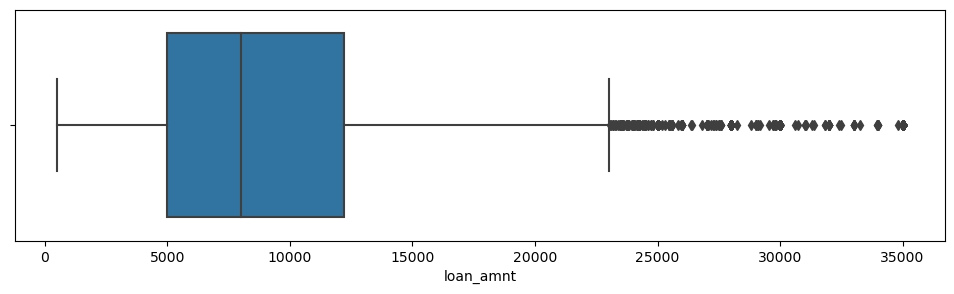

In [75]:
# Checking of outliers in loan_amnt Feature
plt.figure(figsize=(12,3))
sns.boxplot(df["loan_amnt"])

In [92]:
# Count of outliers in loan_amnt by using Z-score method
z = zscore(df["loan_amnt"]).to_list()
z1 = []
for i in z:
    if i > 3 or i <-3:
        z1.append(i)
print(f"Count of Outliers in loan_amnt - {len(z1)}")

Count of Outliers in loan_amnt - 337


<AxesSubplot:xlabel='loan_int_rate'>

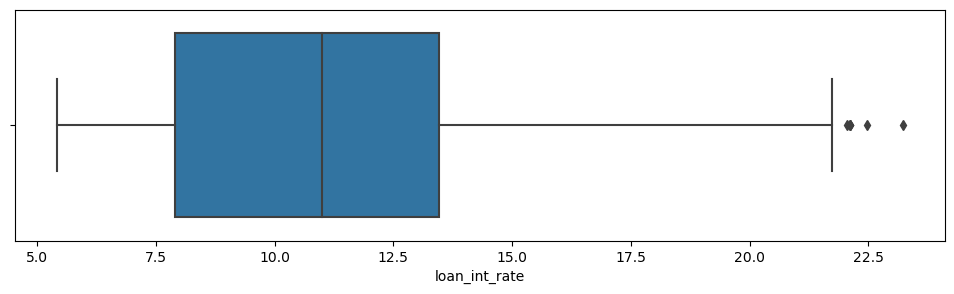

In [76]:
# Checking of outliers in loan_int_rate Feature, Too few outliers in data.
plt.figure(figsize=(12,3))
sns.boxplot(df["loan_int_rate"])

In [93]:
# Count of outliers in loan_int_rate by using Z-score method
z = zscore(df["loan_int_rate"]).to_list()
z1 = []
for i in z:
    if i > 3 or i <-3:
        z1.append(i)
print(f"Count of Outliers in loan_int_rate - {len(z1)}")

Count of Outliers in loan_int_rate - 0


In [104]:
# Count of Outliers using iqr method to crosscheck the above result.
q1 = df["loan_int_rate"].quantile(0.25)
q3 = df["loan_int_rate"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
print(f"Upper tail - {upper_tail}\nLower tail - {lower_tail}")
count = df.loc[(df["loan_int_rate"] > upper_tail) | (df["loan_int_rate"] < lower_tail)].shape[0]
print(f"Count of Outliers in person_income - {count}")

Upper tail - 21.825000000000003
Lower tail - -0.45500000000000007
Count of Outliers in person_income - 6


<AxesSubplot:xlabel='loan_percent_income'>

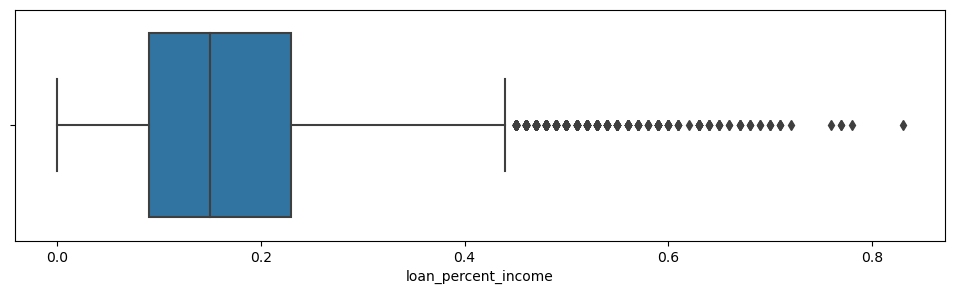

In [77]:
# Checking of outliers in loan_percent_income Feature
plt.figure(figsize=(12,3))
sns.boxplot(df["loan_percent_income"])

In [95]:
# Count of outliers in loan_percent_income by using Z-score method
z = zscore(df["loan_percent_income"]).to_list()
z1 = []
for i in z:
    if i > 3 or i <-3:
        z1.append(i)
print(f"Count of Outliers in loan_percent_income - {len(z1)}")

Count of Outliers in loan_percent_income - 336


<AxesSubplot:xlabel='cb_person_cred_hist_length'>

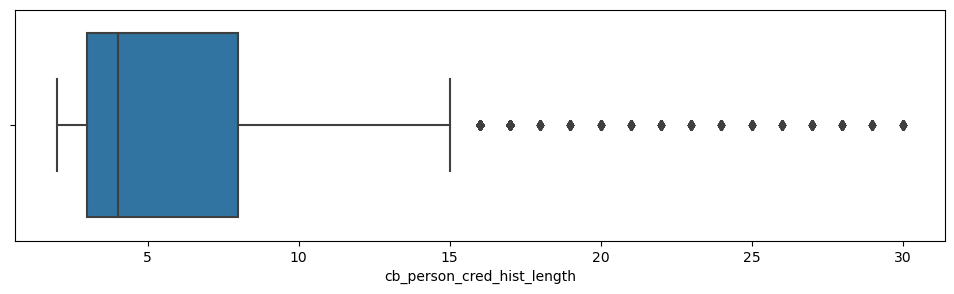

In [78]:
# Checking of outliers in cb_person_cred_hist_length Feature
plt.figure(figsize=(12,3))
sns.boxplot`(df["cb_person_cred_hist_length"])

In [96]:
# Count of outliers in cb_person_cred_hist_length by using Z-score method
z = zscore(df["cb_person_cred_hist_length"]).to_list()
z1 = []
for i in z:
    if i > 3 or i <-3:
        z1.append(i)
print(f"Count of Outliers in cb_person_cred_hist_length - {len(z1)}")

Count of Outliers in cb_person_cred_hist_length - 284


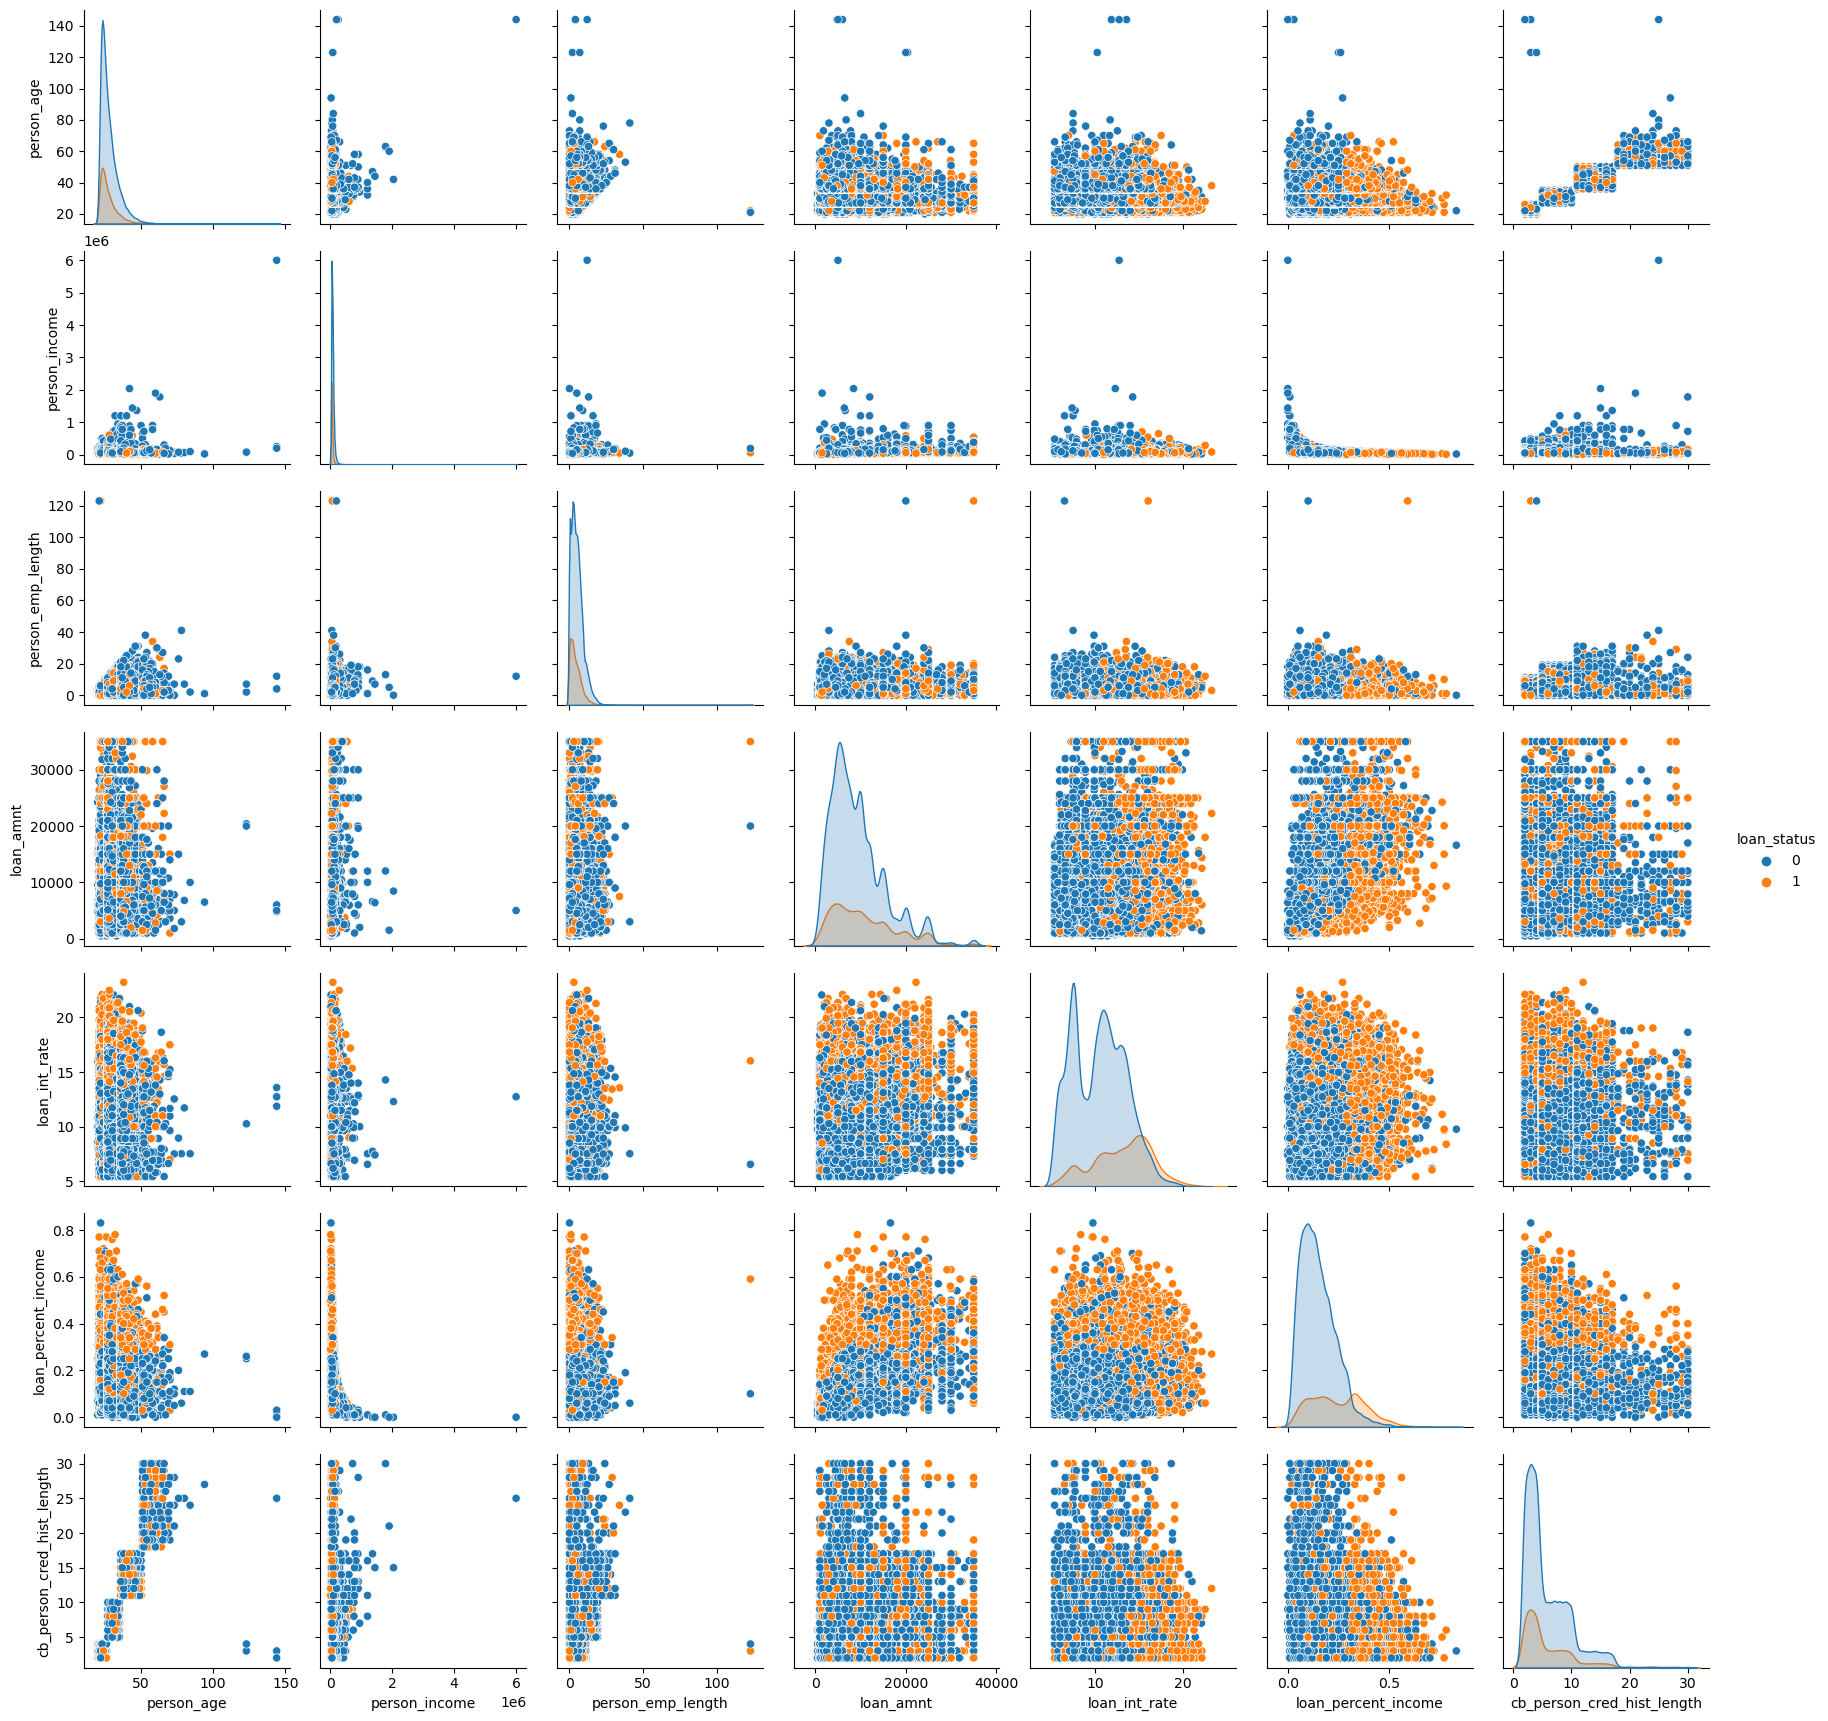

In [43]:
# Pairplot for Distribution
sns.pairplot(df,hue="loan_status")

- Correlation with Target Feature

In [105]:
# Checking for Relation of independent feature with dependent features and and we are not getting good correlation.
df.corr()

person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173202           0.163106   
person_income                 0.173202       1.000000           0.134268   
person_emp_length             0.163106       0.134268           1.000000   
loan_amnt                     0.050787       0.266820           0.113082   
loan_int_rate                 0.012580       0.000792          -0.056405   
loan_status                  -0.021629      -0.144449          -0.082489   
loan_percent_income          -0.042411      -0.254471          -0.054111   
cb_person_cred_hist_length    0.859133       0.117987           0.144699   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.012580    -0.021629   
person_income                0.266820       0.000792    -0.144449   
person_emp_length            0.113082      -0.056405    -0.082489   
loan_amnt                    1.000000       0.146813     0.105376   
loan_int_rate                0.146813       1.000000     0.335133   
loan_status                  0.105376       0.335133     1.000000   
loan_percent_income          0.572612       0.120314     0.379366   
cb_person_cred_hist_length   0.041967       0.016696    -0.015529   

                            loan_percent_income  cb_person_cred_hist_length  
person_age                            -0.042411                    0.859133  
person_income                         -0.254471                    0.117987  
person_emp_length                     -0.054111                    0.144699  
loan_amnt                              0.572612                    0.041967  
loan_int_rate                          0.120314                    0.016696  
loan_status                            0.379366                   -0.015529  
loan_percent_income                    1.000000                   -0.031690  
cb_person_cred_hist_length            -0.031690                    1.000000

In [139]:
df2 = df.corr().iloc[5,:].to_frame().T
df2

person_age  person_income  person_emp_length  loan_amnt  \
loan_status   -0.021629      -0.144449          -0.082489   0.105376   

             loan_int_rate  loan_status  loan_percent_income  \
loan_status       0.335133          1.0             0.379366   

             cb_person_cred_hist_length  
loan_status                   -0.015529

<Figure size 600x1400 with 0 Axes>

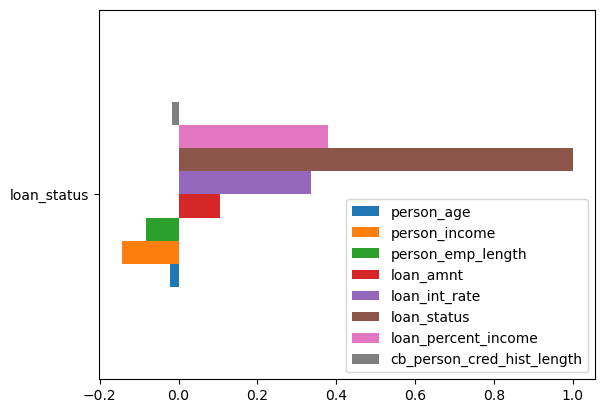

In [136]:
# bar plot of correlation of Loans status feature with respect to all independent features. 
df2.plot(kind="barh")

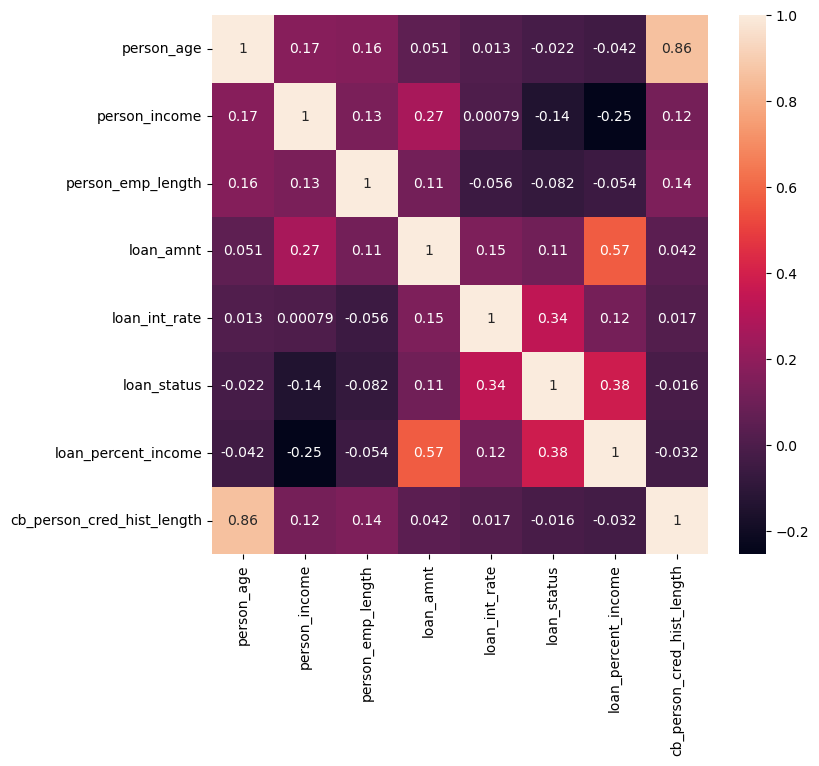

In [121]:
# Heatmap for correlation Values
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

- VIF (Variance Inflation Factor)

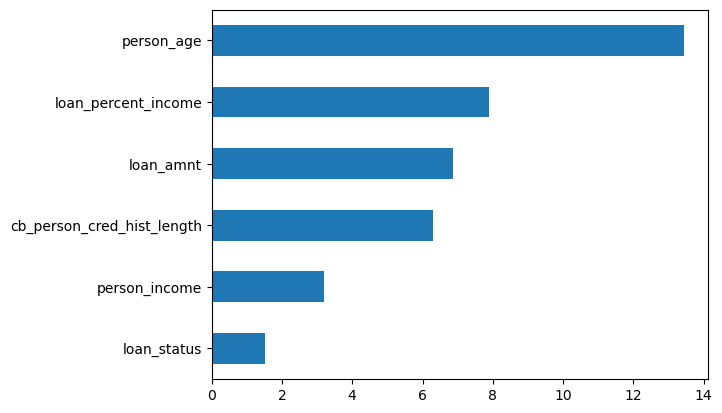

In [8]:
# Checking for relation between independent features. Here im dropping Features having null values
x = df.select_dtypes(exclude="object").drop(["loan_int_rate","person_emp_length"],axis=1)
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
x1 = pd.Series(vif_list,index=x.columns)
x1.sort_values().plot(kind="barh")
plt.show()

### - Status of Target Feature

In [ ]:
# First of all We dont require label encoding beacuse target column is actually in numerical datatype.

In [141]:
df["loan_status"].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

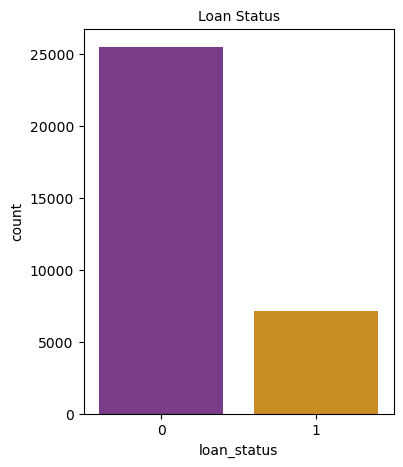

In [39]:
plt.figure(figsize=(4,5))
sns.countplot(df["loan_status"], palette='CMRmap')
plt.title("Loan Status",fontsize=10)
plt.show()

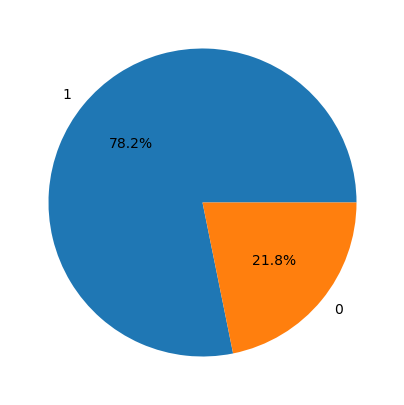

In [40]:
plt.figure(figsize=(5,5))
plt.pie(df["loan_status"].value_counts(),labels=df["loan_status"].unique()
        ,autopct="%1.1f%%")
plt.show()

In [ ]:
# so here we also got to know that there is bias in the categories so we have to perform sampling on it.
# Major category contains 78.2 percent of data and minor category contains 21.8 per data.

- EDA Report using Pandas Profilling

In [140]:
pf = pandas_profiling.ProfileReport(df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
pf.to_file("EDA Report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]